In [1]:
import cobra as cb
import numpy as np

In [2]:
model = cb.io.read_sbml_model('/home/yashjonjale/Documents/iGEM/iGEM-IITB/FBA/Metabolic_Reconstructions/MODEL1108160000_url.xml')



Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf_c "10-Formyltetrahydrofolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf_c "10-Formyltetrahydrofolate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_12dgr120_c "1,2-Diacyl-sn-glycerol (didodecanoyl, n-C12:0)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_12dgr120_c "1,2-Diacyl-sn-glycerol (didodecanoyl, n-C12:0)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_12dgr140_c "1,2-Diacyl-sn-glycerol (ditetradecanoyl, n-C14:0)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <S

In [3]:
o2_ex = model.reactions.get_by_id('EX_o2_LPAREN_e_RPAREN_')
glc_r = model.reactions.get_by_id('EX_glc_LPAREN_e_RPAREN_')

In [37]:
glc_r.upper_bound=0
glc_r.lower_bound=0
o2_ex.upper_bound=0
o2_ex.lower_bound=0
solns = []
n = 20
m = 20 

In [38]:
for i in range(0,n):
    z = []
    if i == 0:
        glc_r.lower_bound=0
        glc_r.upper_bound=0
    else:
        glc_r.lower_bound=-i
        glc_r.upper_bound=-i
    for j in range(0,m):
        if j == 0:
            o2_ex.upper_bound=0
            o2_ex.lower_bound=0
        else:
            o2_ex.lower_bound=-j
            o2_ex.upper_bound=-j
        x = model.optimize()
        z.append(x.objective_value)
        print(f"The objective value at i,j = {-i},{-j} is {x.objective_value}")
    solns.append(z)

/home/yashjonjale/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


The objective value at i,j = 0,0 is -0.0527957306656975
The objective value at i,j = 0,-1 is 0.0
The objective value at i,j = 0,-2 is 0.0
The objective value at i,j = 0,-3 is 0.0
The objective value at i,j = 0,-4 is 0.0
The objective value at i,j = 0,-5 is 0.0
The objective value at i,j = 0,-6 is 0.0
The objective value at i,j = 0,-7 is 0.0
The objective value at i,j = 0,-8 is 0.0
The objective value at i,j = 0,-9 is 0.0
The objective value at i,j = 0,-10 is 0.0
The objective value at i,j = 0,-11 is 0.0
The objective value at i,j = 0,-12 is 0.0
The objective value at i,j = 0,-13 is 0.0
The objective value at i,j = 0,-14 is 0.0
The objective value at i,j = 0,-15 is 0.0
The objective value at i,j = 0,-16 is 0.0
The objective value at i,j = 0,-17 is 0.0
The objective value at i,j = 0,-18 is 0.0
The objective value at i,j = 0,-19 is 0.0
The objective value at i,j = -1,0 is 0.0
The objective value at i,j = -1,-1 is 0.04094019285821616
The objective value at i,j = -1,-2 is 0.0779123122978589

In [41]:
# print(solns)
print(len(solns))
# for x in solns:
#     print(len(x))
Arr2D = np.array(solns)
print(Arr2D.shape)

20
(20, 20)


In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

TypeError: Axes3D.view_init() got an unexpected keyword argument 'roll'

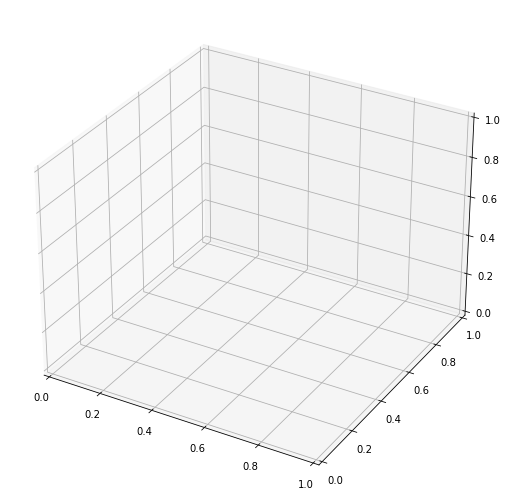

In [51]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
x = np.arange(0, n, 1)
y = np.arange(0, m, 1)


# Creating figure
fig = plt.figure(figsize =(14, 9)).add_subplot(111,projection='3d')
# ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(x, y, Arr2D, cmap ='viridis')
fig.view_init(elev=0,azim=45,roll=0)
# show plot
plt.show()
